In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from predict_prices import predict_prices, get_validation_data, evalute_predictor
from predictors.median import predict_with_median
from predictors.linear_regression_one_variable import predict_with_lot_area
from predictors.linear_regression_all_easy_variables import predict_with_all_easy_linear, predict_with_ridge, predict_with_polynomial_features_and_ridge

train = pd.read_csv("data_from_kaggle/train.csv")
(training, validation) = get_validation_data(pd.read_csv("data_from_kaggle/train.csv"))

## Get a general sense of the data
### Plot actual sale price by square footage in validation to get a sense of the data

In [2]:
def visualize_prices(data, x="GrLivArea"):
    plt.scatter(data[x], data["SalePrice"])
    plt.ylim(10000,1000000)
    plt.show() 

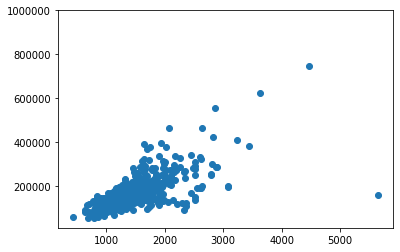

In [3]:
visualize_prices(validation)

### Plot price over time to try to figure out to what extent this is time series data

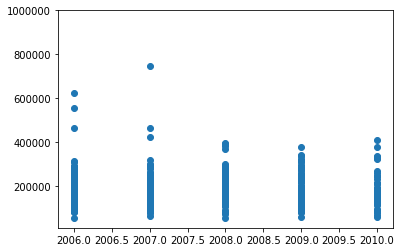

In [4]:
visualize_prices(validation,"YrSold")

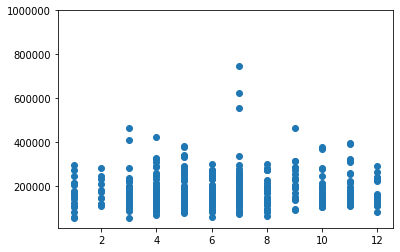

In [5]:
visualize_prices(validation,"MoSold")

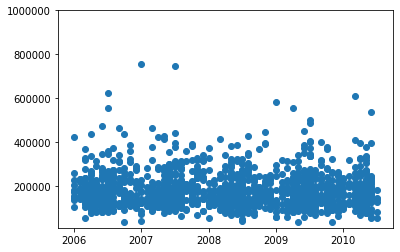

In [6]:
YrMoSold = train.loc[ : , "YrSold"] + ((train.loc[ : , "MoSold"] - 1) / 12)
plt.scatter(YrMoSold, train["SalePrice"])
plt.ylim(10000,1000000)
plt.show()

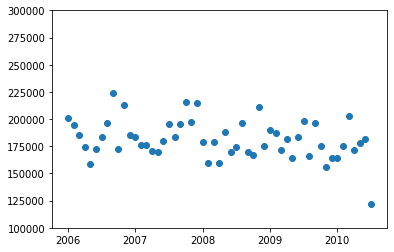

In [7]:
with_yr_mo = train.assign(YrMoSold=YrMoSold)
grouped_by_yr_mo = with_yr_mo.groupby('YrMoSold')
mean_sale_price = grouped_by_yr_mo.SalePrice.mean()
plt.scatter(mean_sale_price.index, mean_sale_price.values)
plt.ylim(100000,300000)
plt.show()

To my eye, there's no obvious huge temporal pattern

## For each predictor, plot predicted sale price by square footage. Also, show RMSE on validation for that predictor.

### Predict that each house in test will have sell for the median price of a house in train:

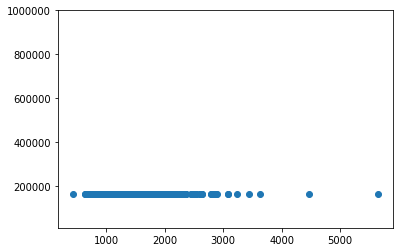

In [8]:
visualize_prices(predict_with_median(training, validation))

In [9]:
evalute_predictor("data_from_kaggle/train.csv", predict_with_median)

0.38540945512003505

### Single variable linear regression using lot area:

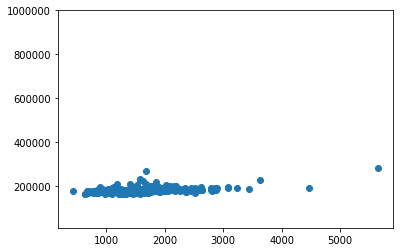

In [10]:
visualize_prices(predict_with_lot_area(training, validation))

In [11]:
evalute_predictor("data_from_kaggle/train.csv", predict_with_lot_area)

0.3806132062743341

### Linear regression using naively all features that are expressed as numbers:

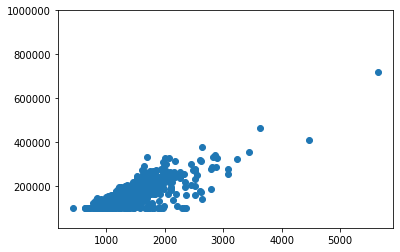

In [12]:
visualize_prices(predict_with_all_easy_linear(training, validation))

In [13]:
evalute_predictor("data_from_kaggle/train.csv", predict_with_all_easy_linear)

0.19690523984400402

### Ridge regression -- a type of regularized linear regression: https://scikit-learn.org/stable/modules/linear_model.html

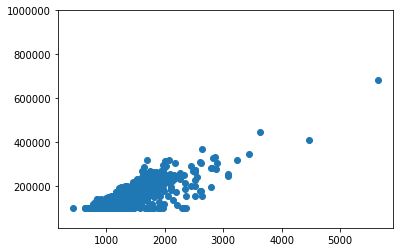

In [14]:
visualize_prices(predict_with_ridge(training, validation))

In [15]:
evalute_predictor("data_from_kaggle/train.csv", predict_with_ridge)

0.1963702292220615

### Polynomial features + ridge regression

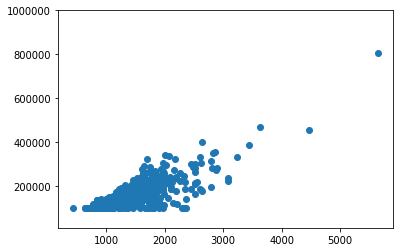

In [16]:
visualize_prices(predict_with_polynomial_features_and_ridge(training, validation, {"degree": 2, "clip": 100000}))

In [17]:
evalute_predictor("data_from_kaggle/train.csv", predict_with_polynomial_features_and_ridge, {"degree": 2, "clip": 100000})

0.18635578448665965

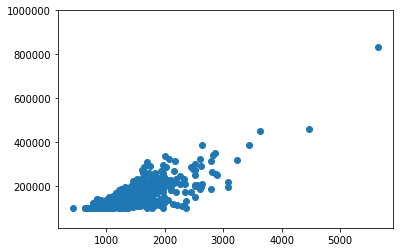

In [18]:
visualize_prices(predict_with_polynomial_features_and_ridge(training, validation, {"degree": 3, "clip": 100000}))

In [19]:
evalute_predictor("data_from_kaggle/train.csv", predict_with_polynomial_features_and_ridge, {"degree": 3, "clip": 100000})

0.1912215659535846

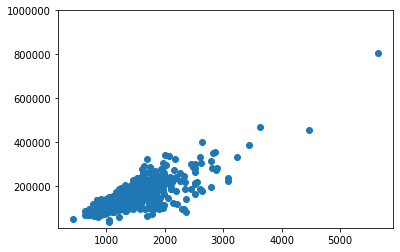

In [20]:
visualize_prices(predict_with_polynomial_features_and_ridge(training, validation, {"degree": 2, "clip": 10000}))

In [21]:
evalute_predictor("data_from_kaggle/train.csv", predict_with_polynomial_features_and_ridge, {"degree": 2, "clip": 10000})

0.19617061677194958